In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)

ca - number of major vessels (0-3) colored by flourosopy

thal(thallium stress)- 0 to 3

Output- 0(less chance of heart attack) and 1(more chance of heart attack)

In [2]:
df=pd.read_csv('data/heart.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(list(df.columns))

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [8]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold')
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold')

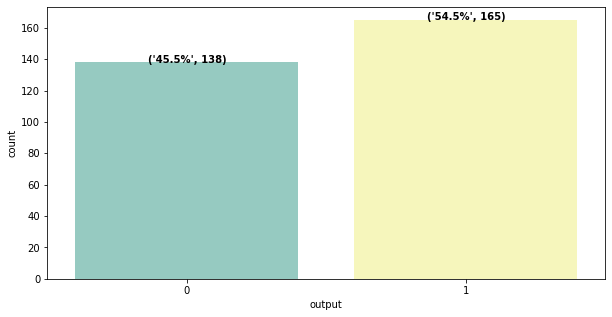

In [9]:
plt.figure(figsize=(10,5))
c=sns.countplot(data=df,x='output',palette='Set3')
without_hue(df,'output',c)

# Univariate Analysis

## Categorical Features

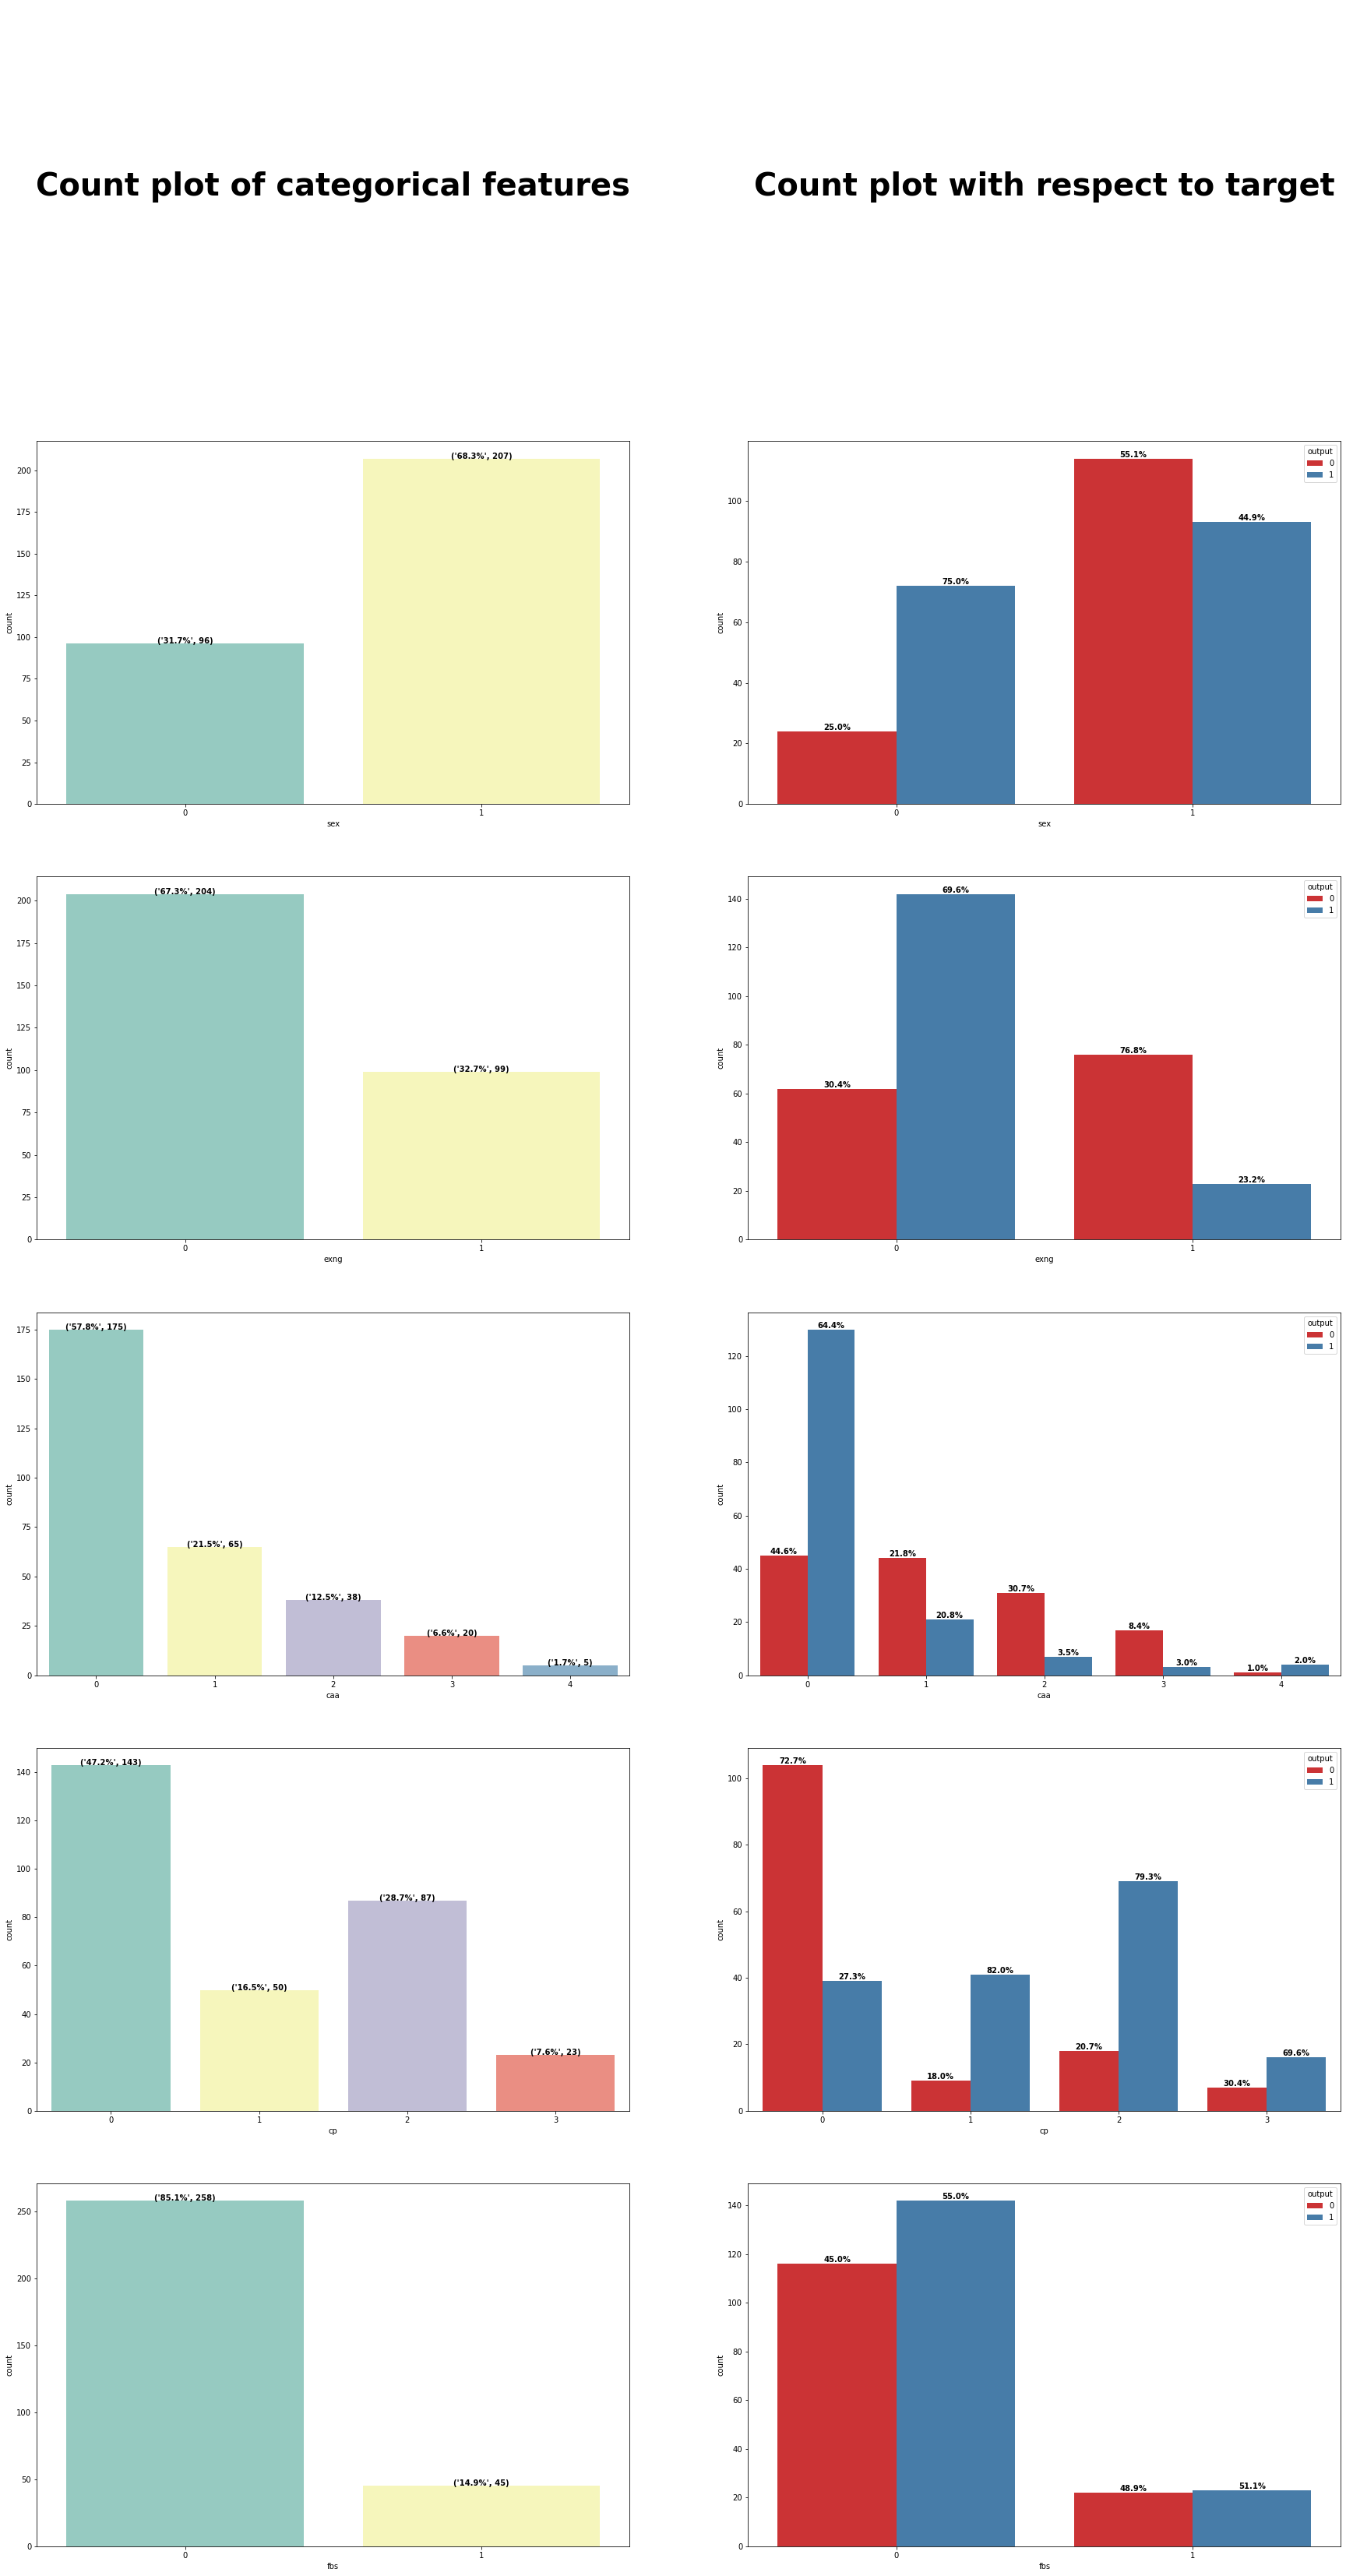

In [10]:
f,ax=plt.subplots(nrows=6,ncols=2,figsize=(30,60))

ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][0].tick_params(left=False,bottom=False)
ax[0][0].set_xticklabels([])
ax[0][0].set_yticklabels([])
ax[0][0].text(0.5,0.5,"Count plot of categorical features",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=40)


ax[0][1].spines['bottom'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)

ax[0][1].tick_params(left=False,bottom=False)
ax[0][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[0][1].text(0.5,0.5,"Count plot with respect to target",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=40)




a1=sns.countplot(data=df,x='sex',palette='Set3',ax=ax[1][0])
without_hue(df,'sex',a1)
a2=sns.countplot(data=df,x='sex',hue='output',ax=ax[1][1],palette='Set1')
with_hue(df,'sex',a2)

b1=sns.countplot(data=df,x='exng',palette='Set3',ax=ax[2][0])
without_hue(df,'exng',b1)
b2=sns.countplot(data=df,x='exng',hue='output',ax=ax[2][1],palette='Set1')
with_hue(df,'exng',b2)


c1=sns.countplot(data=df,x='caa',palette='Set3',ax=ax[3][0])
without_hue(df,'sex',c1)
c2=sns.countplot(data=df,x='caa',hue='output',ax=ax[3][1],palette='Set1')
with_hue(df,'sex',c2)


d1=sns.countplot(data=df,x='cp',palette='Set3',ax=ax[4][0])
without_hue(df,'cp',d1)
d2=sns.countplot(data=df,x='cp',hue='output',ax=ax[4][1],palette='Set1')
with_hue(df,'cp',d2)


e1=sns.countplot(data=df,x='fbs',palette='Set3',ax=ax[5][0])
without_hue(df,'fbs',e1)
e2=sns.countplot(data=df,x='fbs',hue='output',ax=ax[5][1],palette='Set1')
with_hue(df,'fbs',e2)

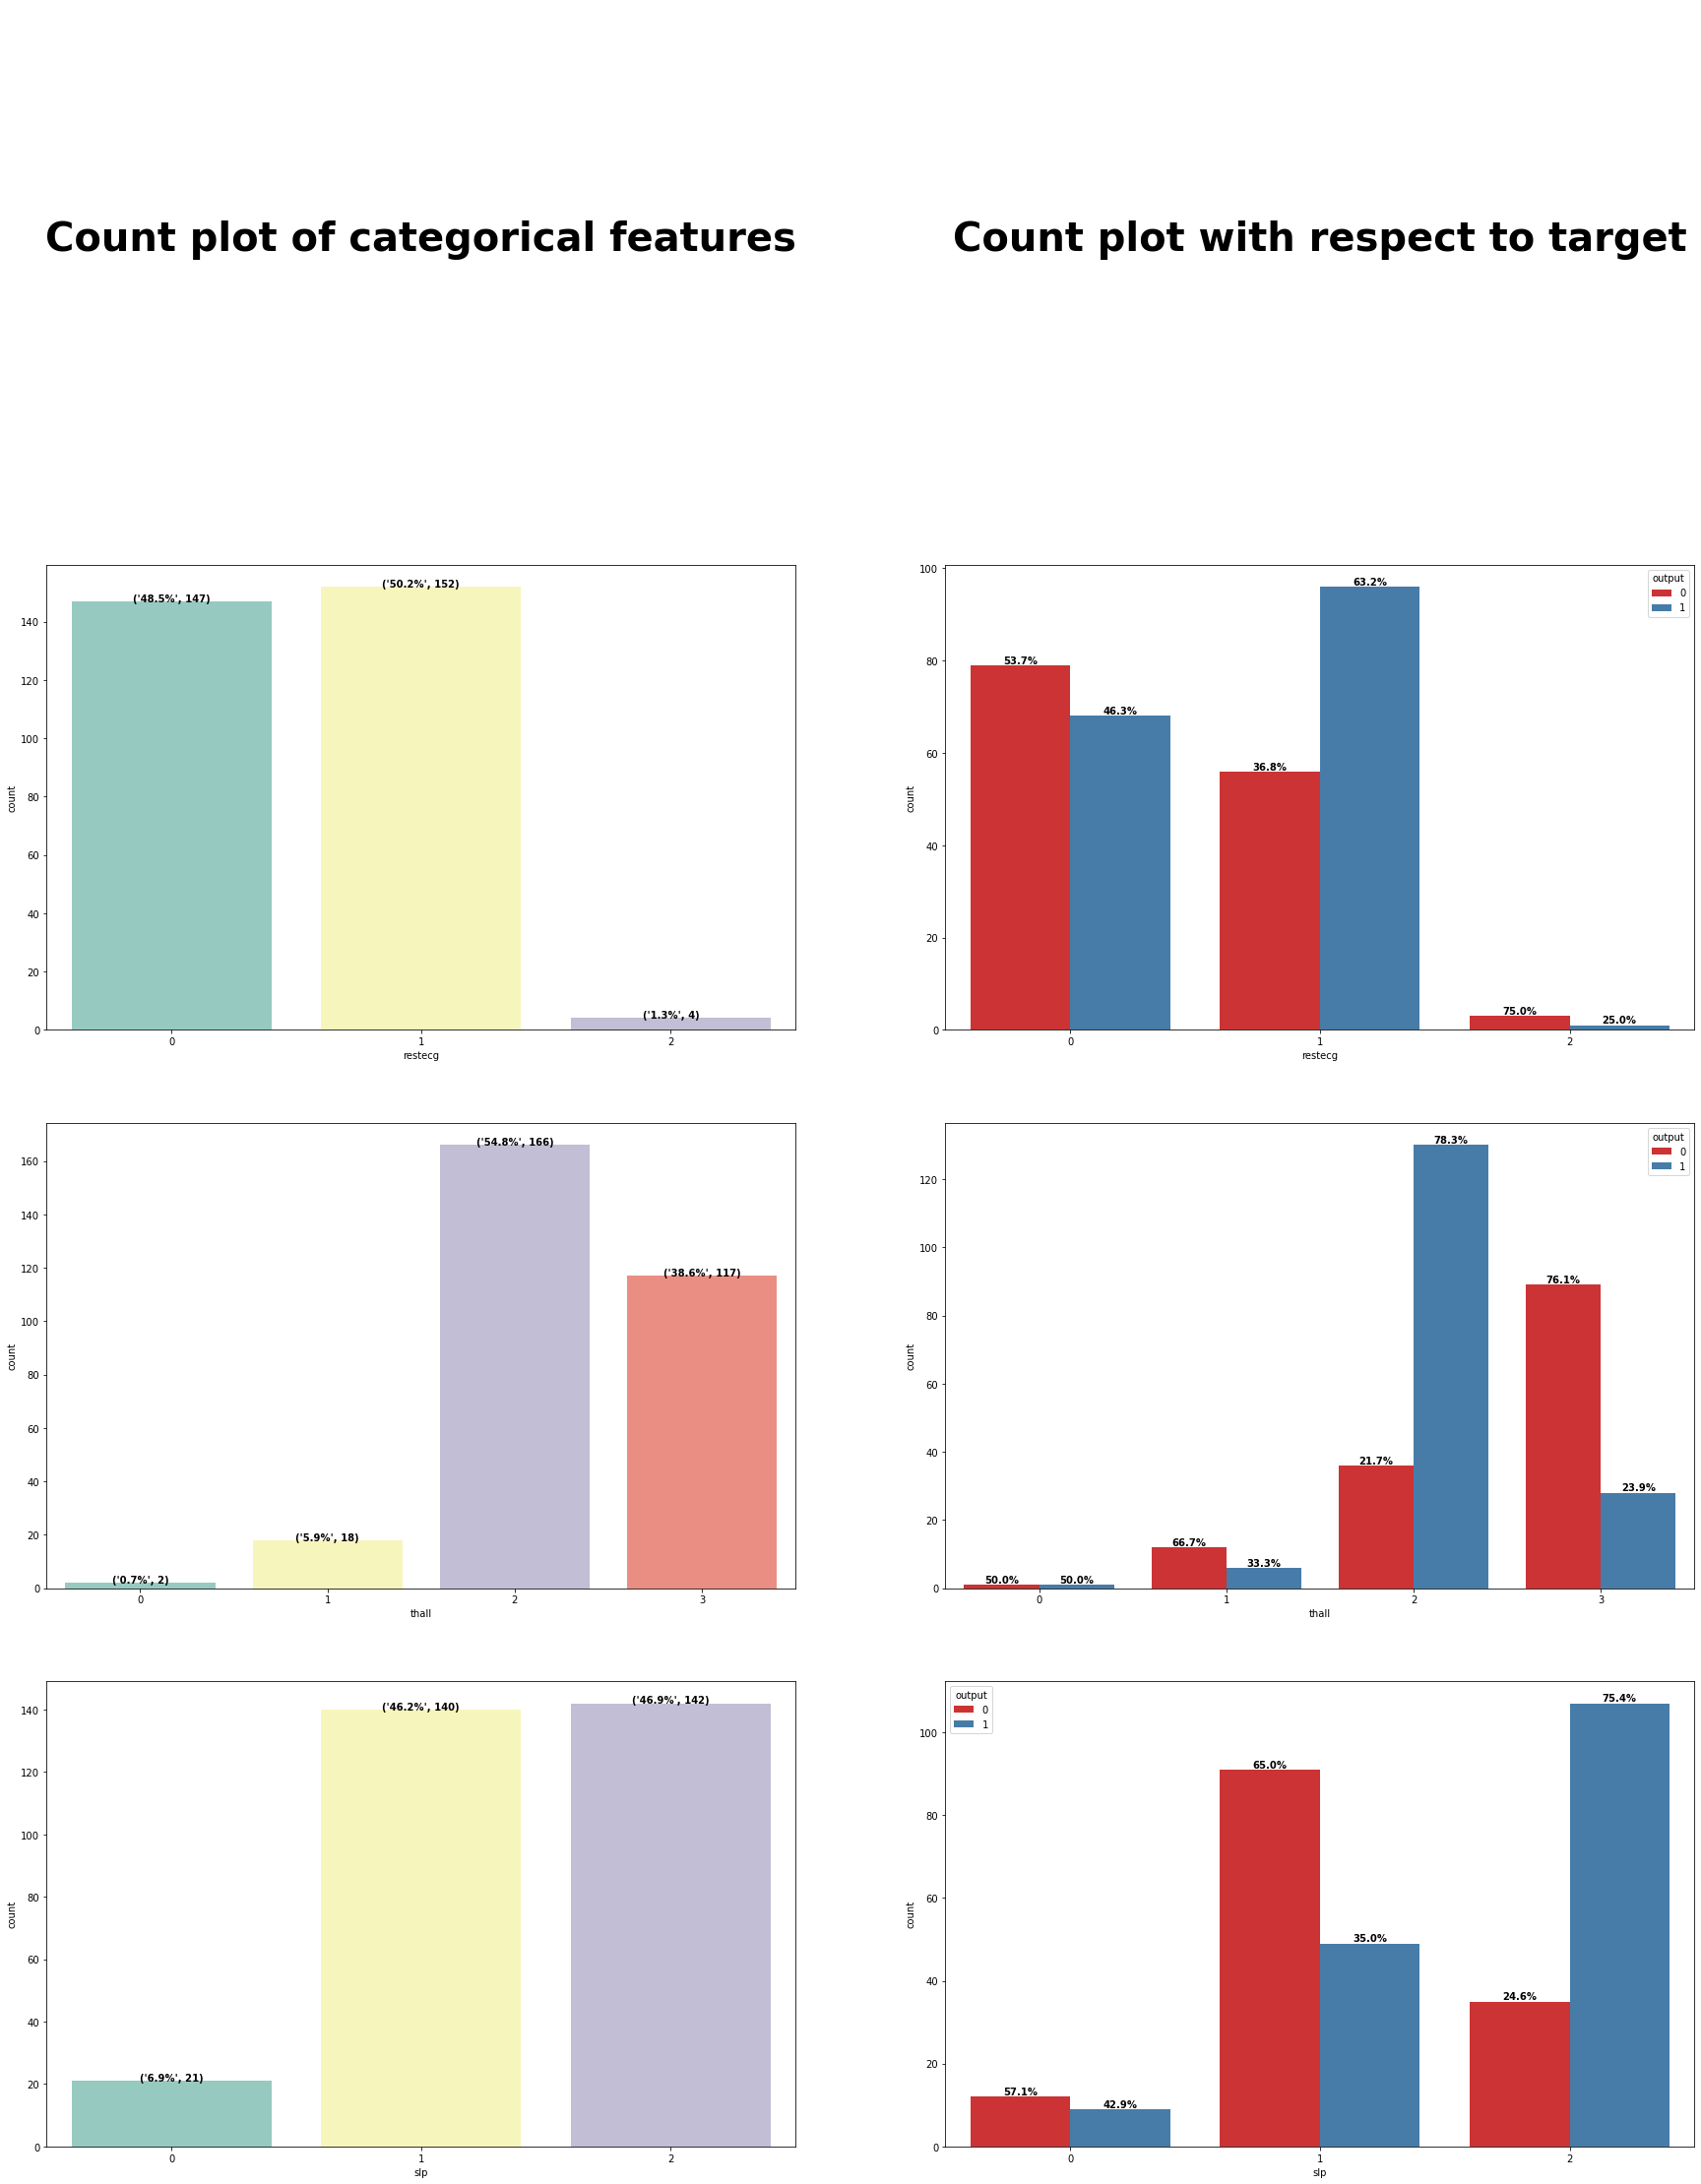

In [11]:
f,ax=plt.subplots(nrows=4,ncols=2,figsize=(30,40))

ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][0].tick_params(left=False,bottom=False)
ax[0][0].set_xticklabels([])
ax[0][0].set_yticklabels([])
ax[0][0].text(0.5,0.5,"Count plot of categorical features",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=40)


ax[0][1].spines['bottom'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)

ax[0][1].tick_params(left=False,bottom=False)
ax[0][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[0][1].text(0.5,0.5,"Count plot with respect to target",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=40)


f1=sns.countplot(data=df,x='restecg',palette='Set3',ax=ax[1][0])
without_hue(df,'restecg',f1)
f2=sns.countplot(data=df,x='restecg',hue='output',ax=ax[1][1],palette='Set1')
with_hue(df,'restecg',f2)

g1=sns.countplot(data=df,x='thall',palette='Set3',ax=ax[2][0])
without_hue(df,'thall',g1)
g2=sns.countplot(data=df,x='thall',hue='output',ax=ax[2][1],palette='Set1')
with_hue(df,'thall',g2)

h1=sns.countplot(data=df,x='slp',palette='Set3',ax=ax[3][0])
without_hue(df,'slp',h1)
h2=sns.countplot(data=df,x='slp',hue='output',ax=ax[3][1],palette='Set1')
with_hue(df,'slp',h2)

## Continuous Features

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

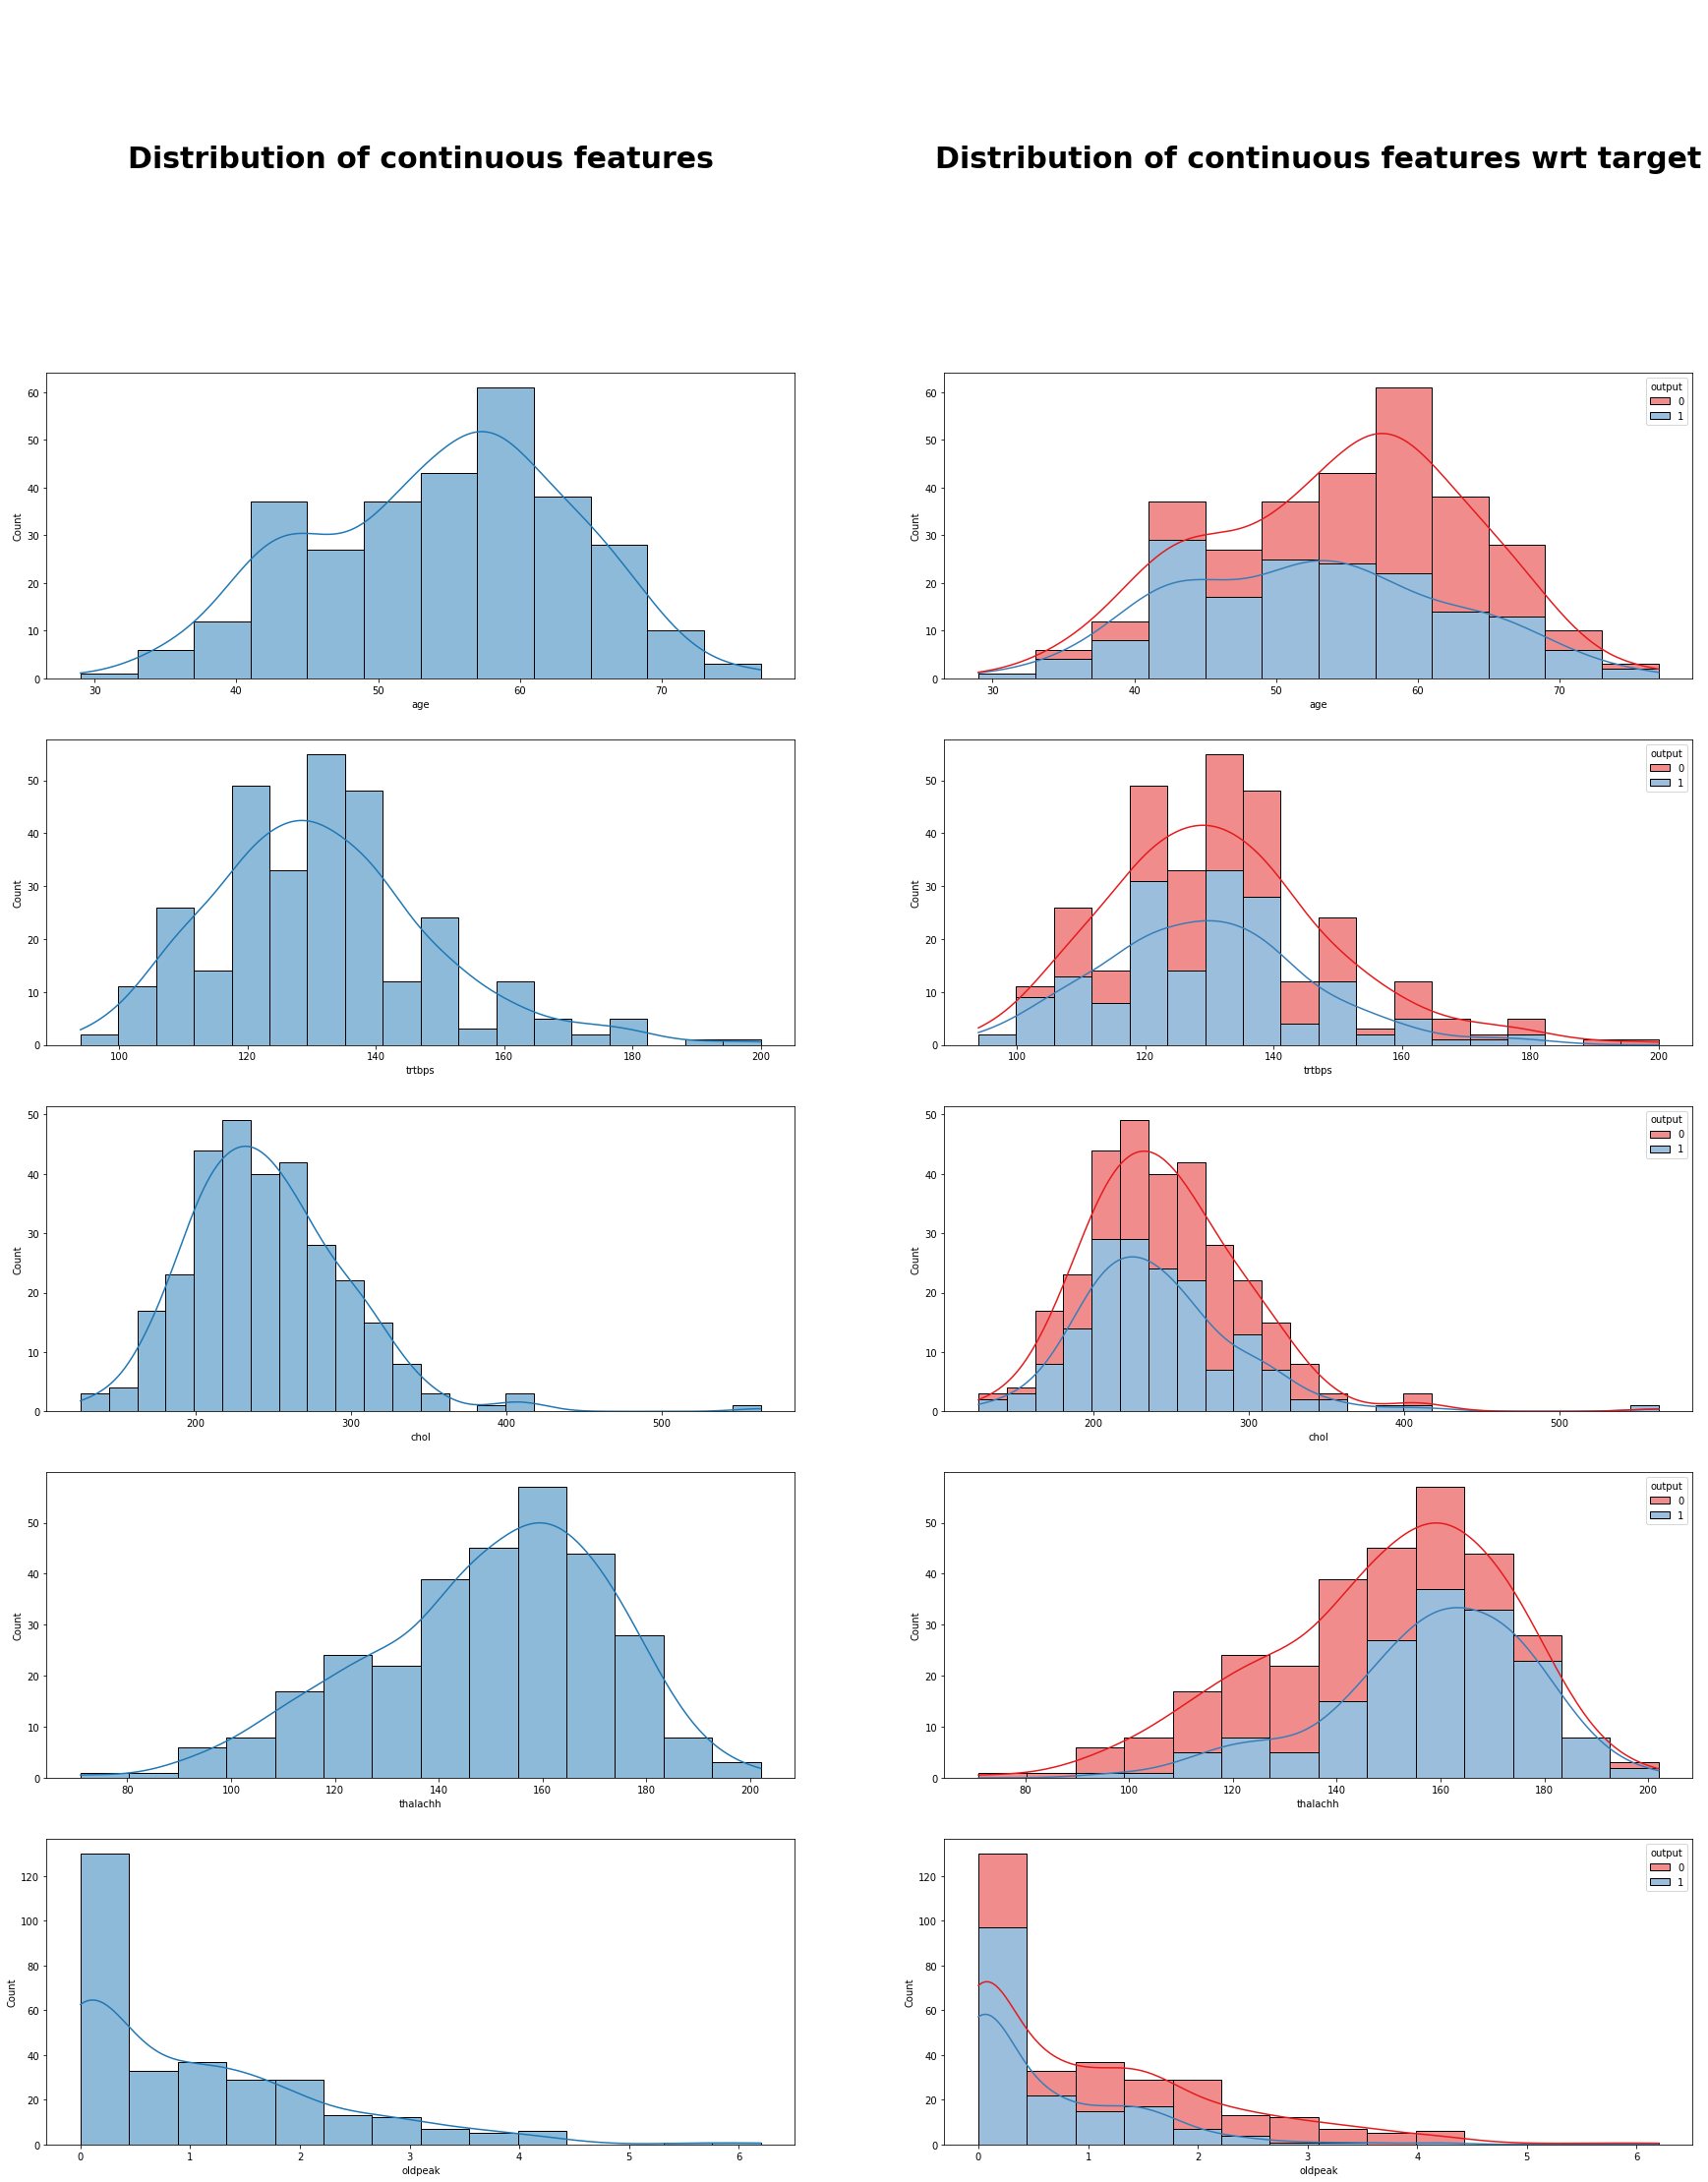

In [12]:
f,ax=plt.subplots(nrows=6,ncols=2,figsize=(30,40))


ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][0].tick_params(left=False,bottom=False)
ax[0][0].set_xticklabels([])
ax[0][0].set_yticklabels([])
ax[0][0].text(0.5,0.5,"Distribution of continuous features",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=30)


ax[0][1].spines['bottom'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)

ax[0][1].tick_params(left=False,bottom=False)
ax[0][1].set_xticklabels([])
ax[0][1].set_yticklabels([])
ax[0][1].text(0.5,0.5,"Distribution of continuous features wrt target",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=30)


sns.histplot(data=df,x='age',palette='Set3',ax=ax[1][0],kde=True)
sns.histplot(data=df,x='age',hue='output',ax=ax[1][1],palette='Set1',multiple='stack',kde=True)

sns.histplot(data=df,x='trtbps',palette='Set3',ax=ax[2][0],kde=True)
sns.histplot(data=df,x='trtbps',hue='output',ax=ax[2][1],palette='Set1',multiple='stack',kde=True)

sns.histplot(data=df,x='chol',palette='Set3',ax=ax[3][0],kde=True)
sns.histplot(data=df,x='chol',hue='output',ax=ax[3][1],palette='Set1',multiple='stack',kde=True)

sns.histplot(data=df,x='thalachh',palette='Set3',ax=ax[4][0],kde=True)
sns.histplot(data=df,x='thalachh',hue='output',ax=ax[4][1],palette='Set1',multiple='stack',kde=True)

sns.histplot(data=df,x='oldpeak',palette='Set3',ax=ax[5][0],kde=True)
sns.histplot(data=df,x='oldpeak',hue='output',ax=ax[5][1],palette='Set1',multiple='stack',kde=True)

<AxesSubplot:xlabel='oldpeak'>

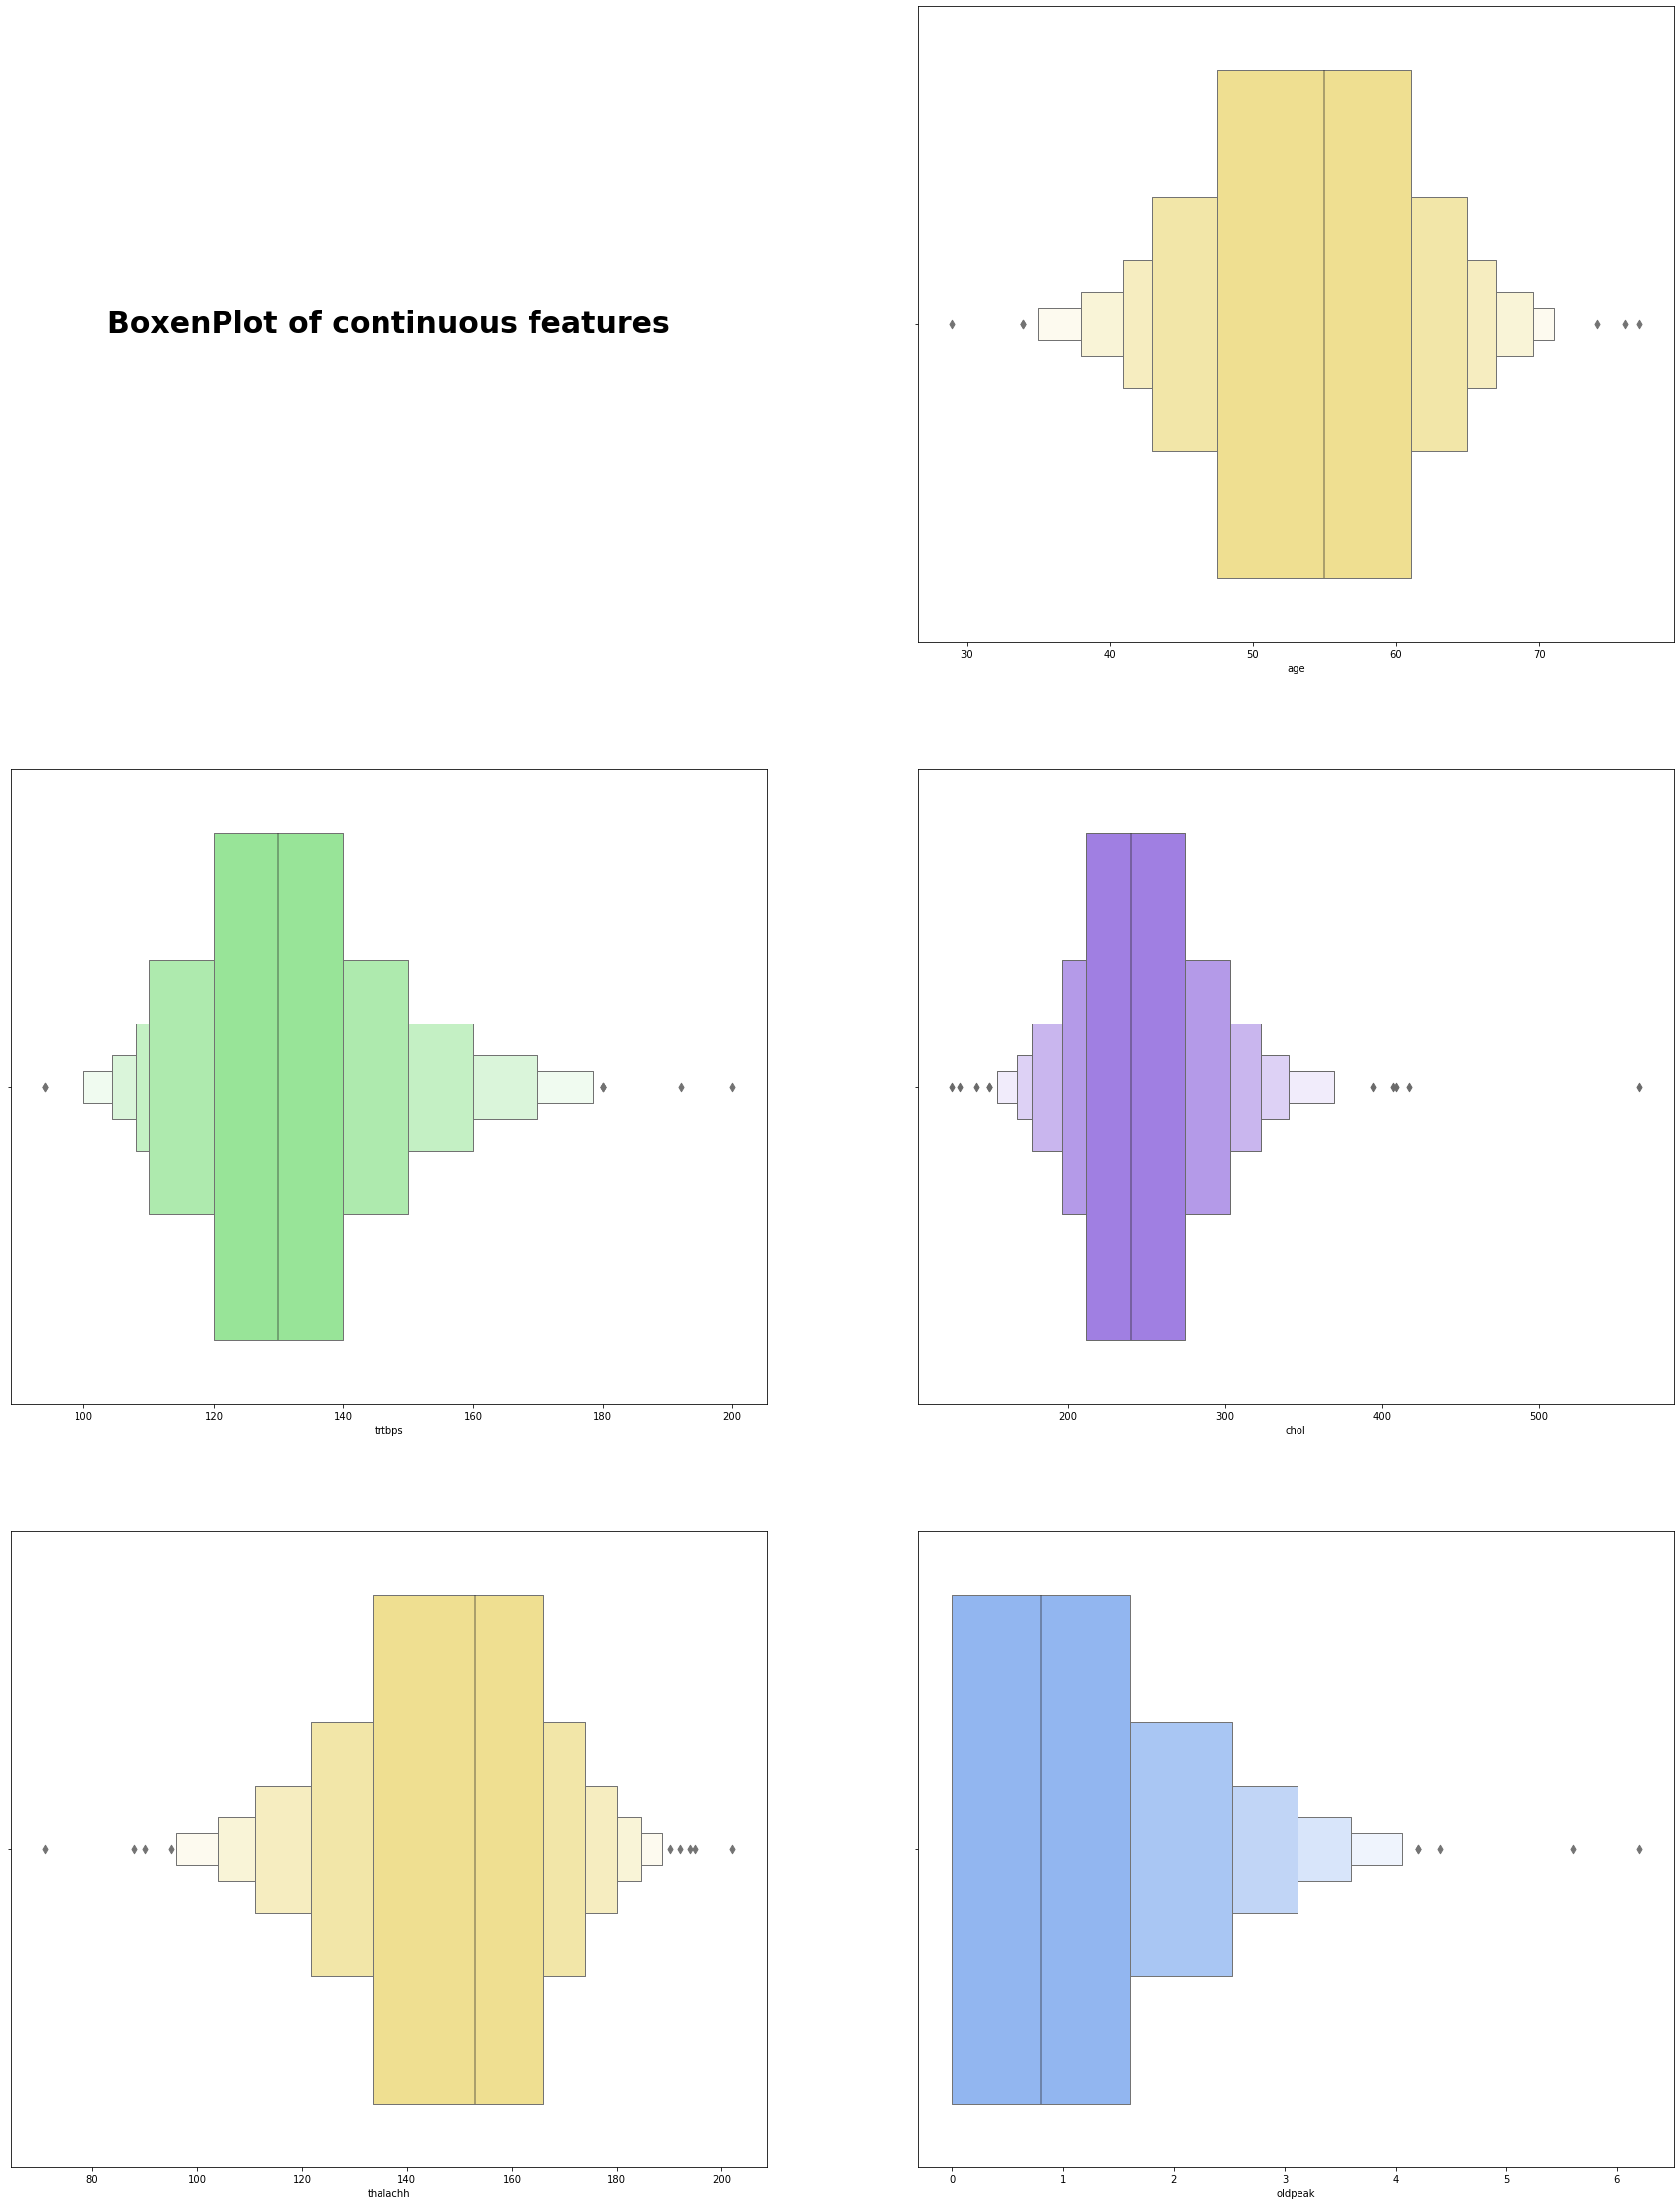

In [13]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(30,40))


ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][0].tick_params(left=False,bottom=False)
ax[0][0].set_xticklabels([])
ax[0][0].set_yticklabels([])
ax[0][0].text(0.5,0.5,"BoxenPlot of continuous features",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=30)



sns.boxenplot(data=df,x='age',palette=['#FFE981'],ax=ax[0][1])

sns.boxenplot(data=df,x='trtbps',palette=['#8BF18B'],ax=ax[1][0])

sns.boxenplot(data=df,x='chol',palette=['#9B6EF3'],ax=ax[1][1])

sns.boxenplot(data=df,x='thalachh',palette=['#FFE981'],ax=ax[2][0])

sns.boxenplot(data=df,x='oldpeak',palette=['#83B2FF'],ax=ax[2][1])

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

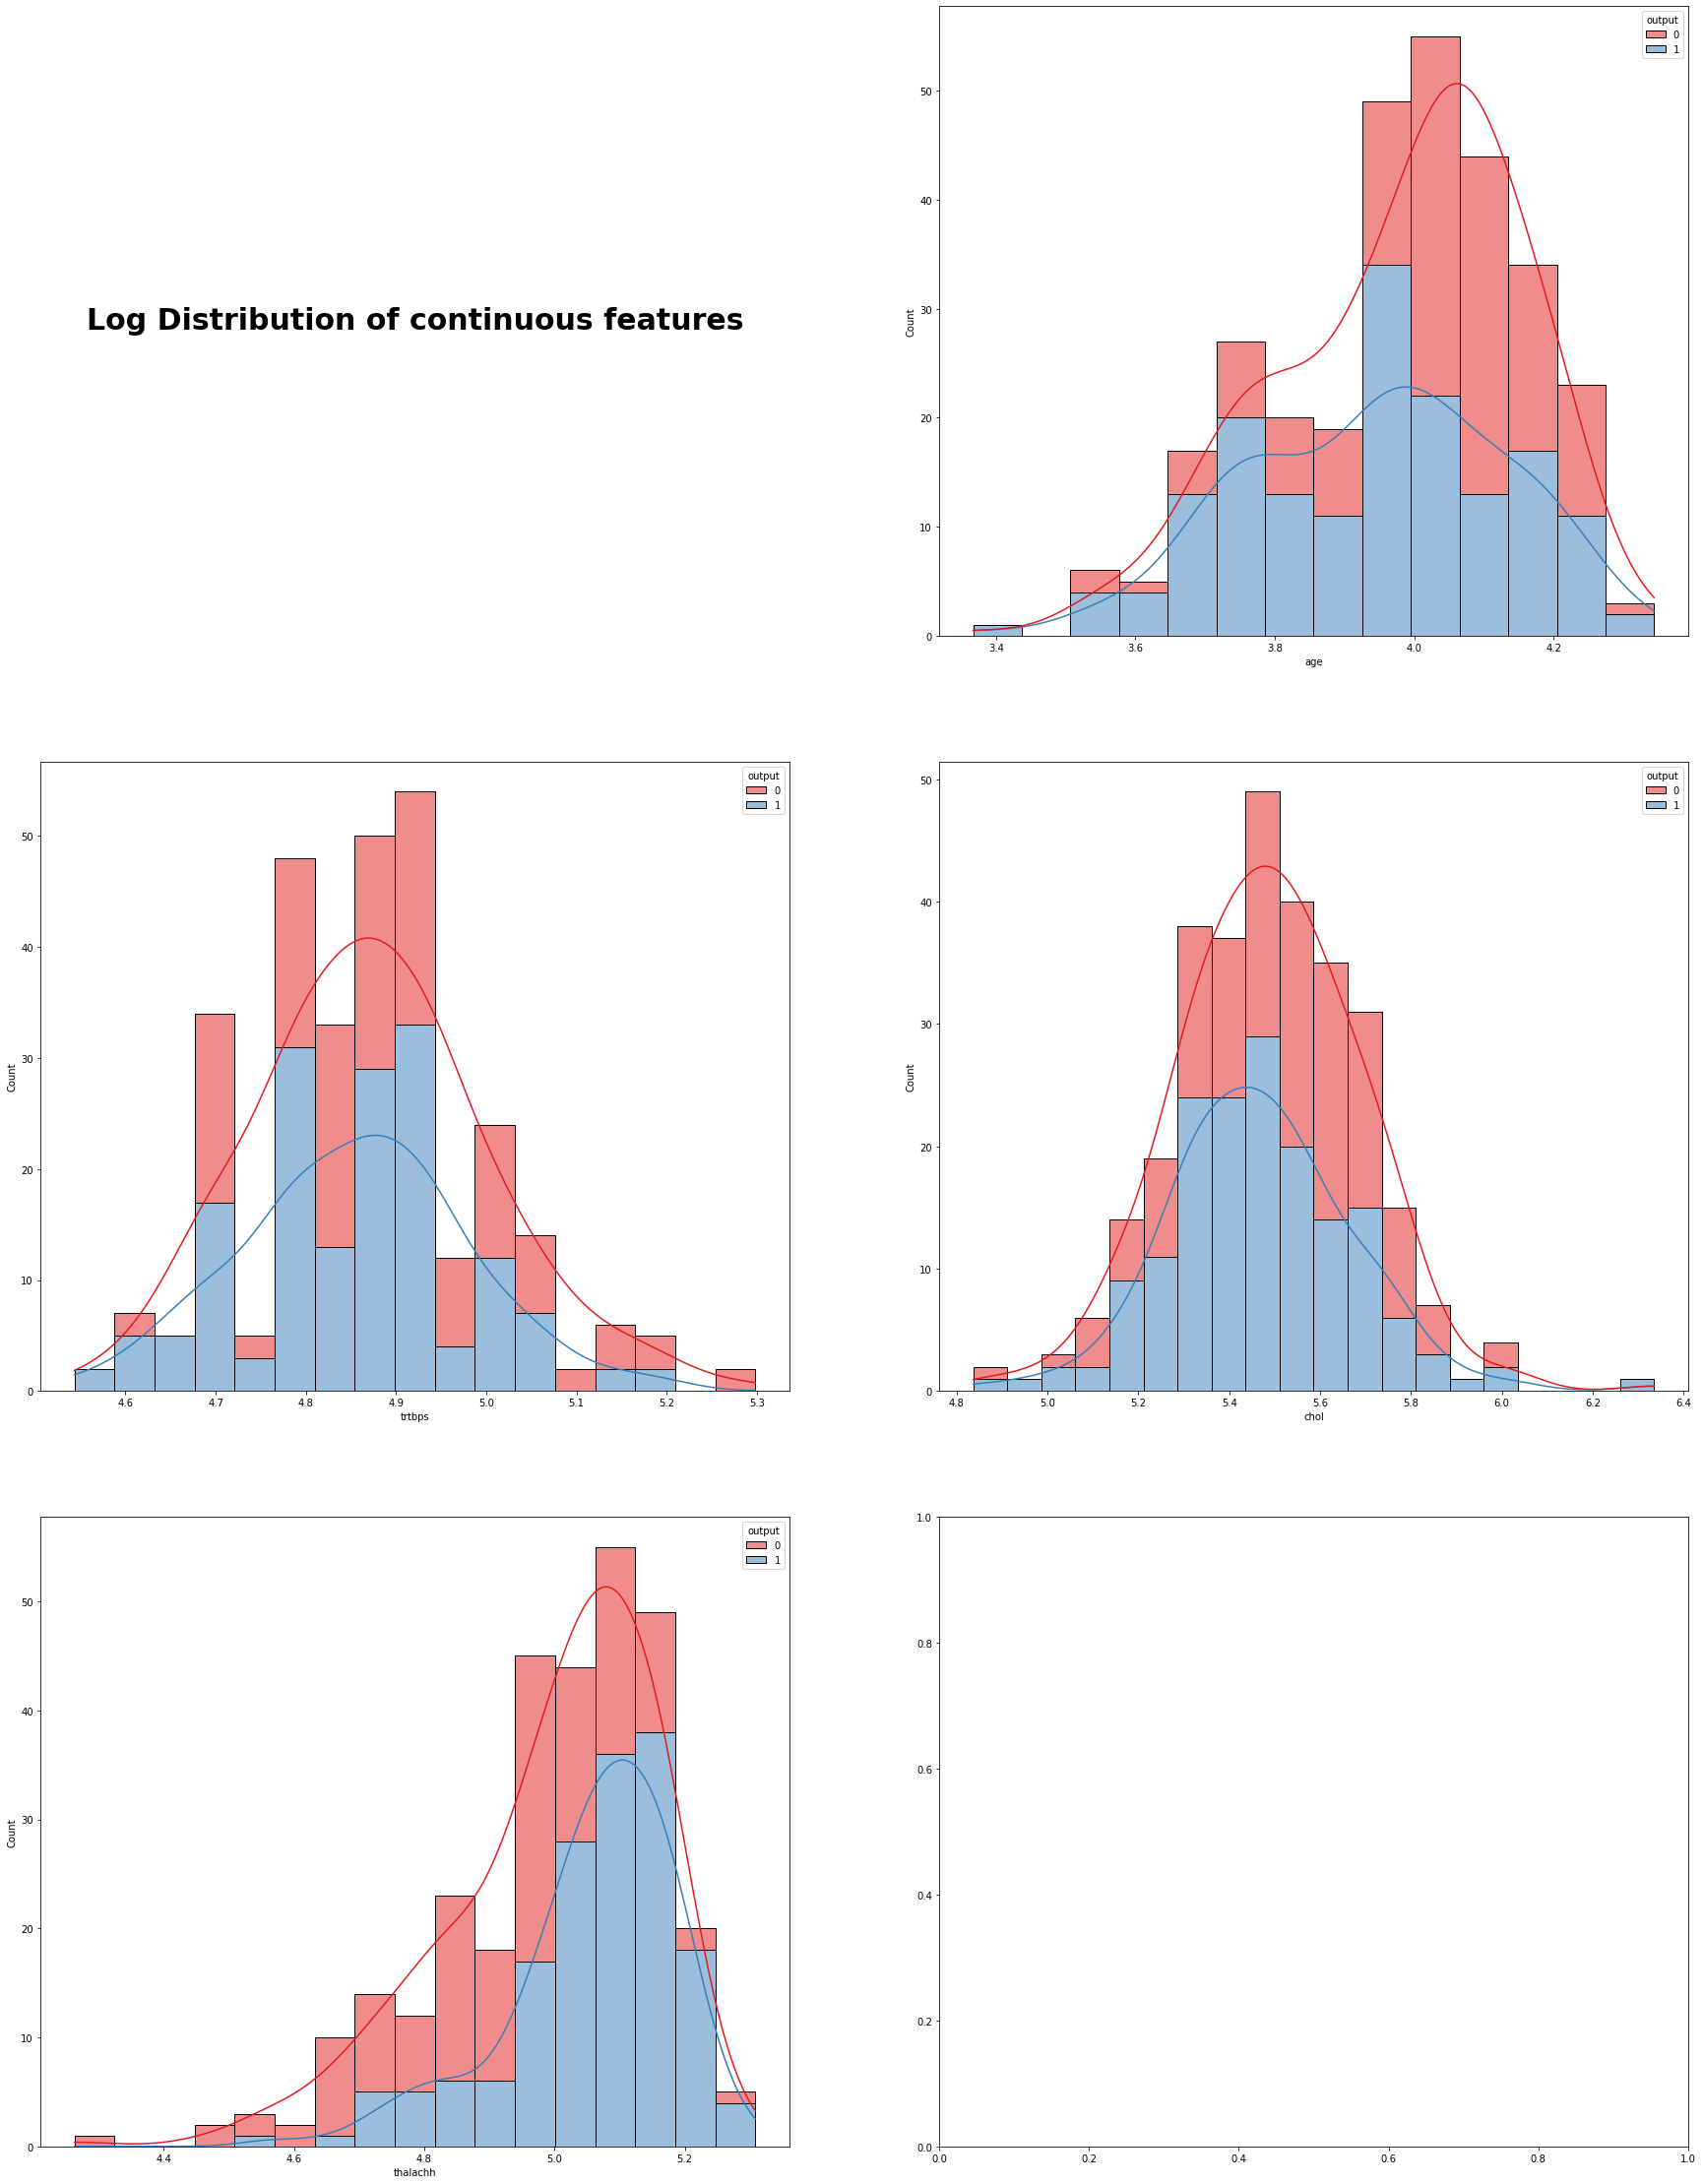

In [14]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(30,40))

ax[0][0].spines['bottom'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)

ax[0][0].tick_params(left=False,bottom=False)
ax[0][0].set_xticklabels([])
ax[0][0].set_yticklabels([])
ax[0][0].text(0.5,0.5,"Log Distribution of continuous features",
            horizontalalignment="center",
            verticalalignment='center',
            fontweight='bold',fontsize=30)



sns.histplot(data=df,x=np.log(df['age']),hue='output',palette="Set1",ax=ax[0][1],kde=True,multiple="stack")

sns.histplot(data=df,x=np.log(df['trtbps']),hue='output',palette="Set1",ax=ax[1][0],kde=True,multiple="stack")

sns.histplot(data=df,x=np.log(df['chol']),hue='output',palette="Set1",ax=ax[1][1],kde=True,multiple="stack")

sns.histplot(data=df,x=np.log(df['thalachh']),hue='output',palette="Set1",ax=ax[2][0],kde=True,multiple="stack")

# Bivariate Analysis

In [15]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

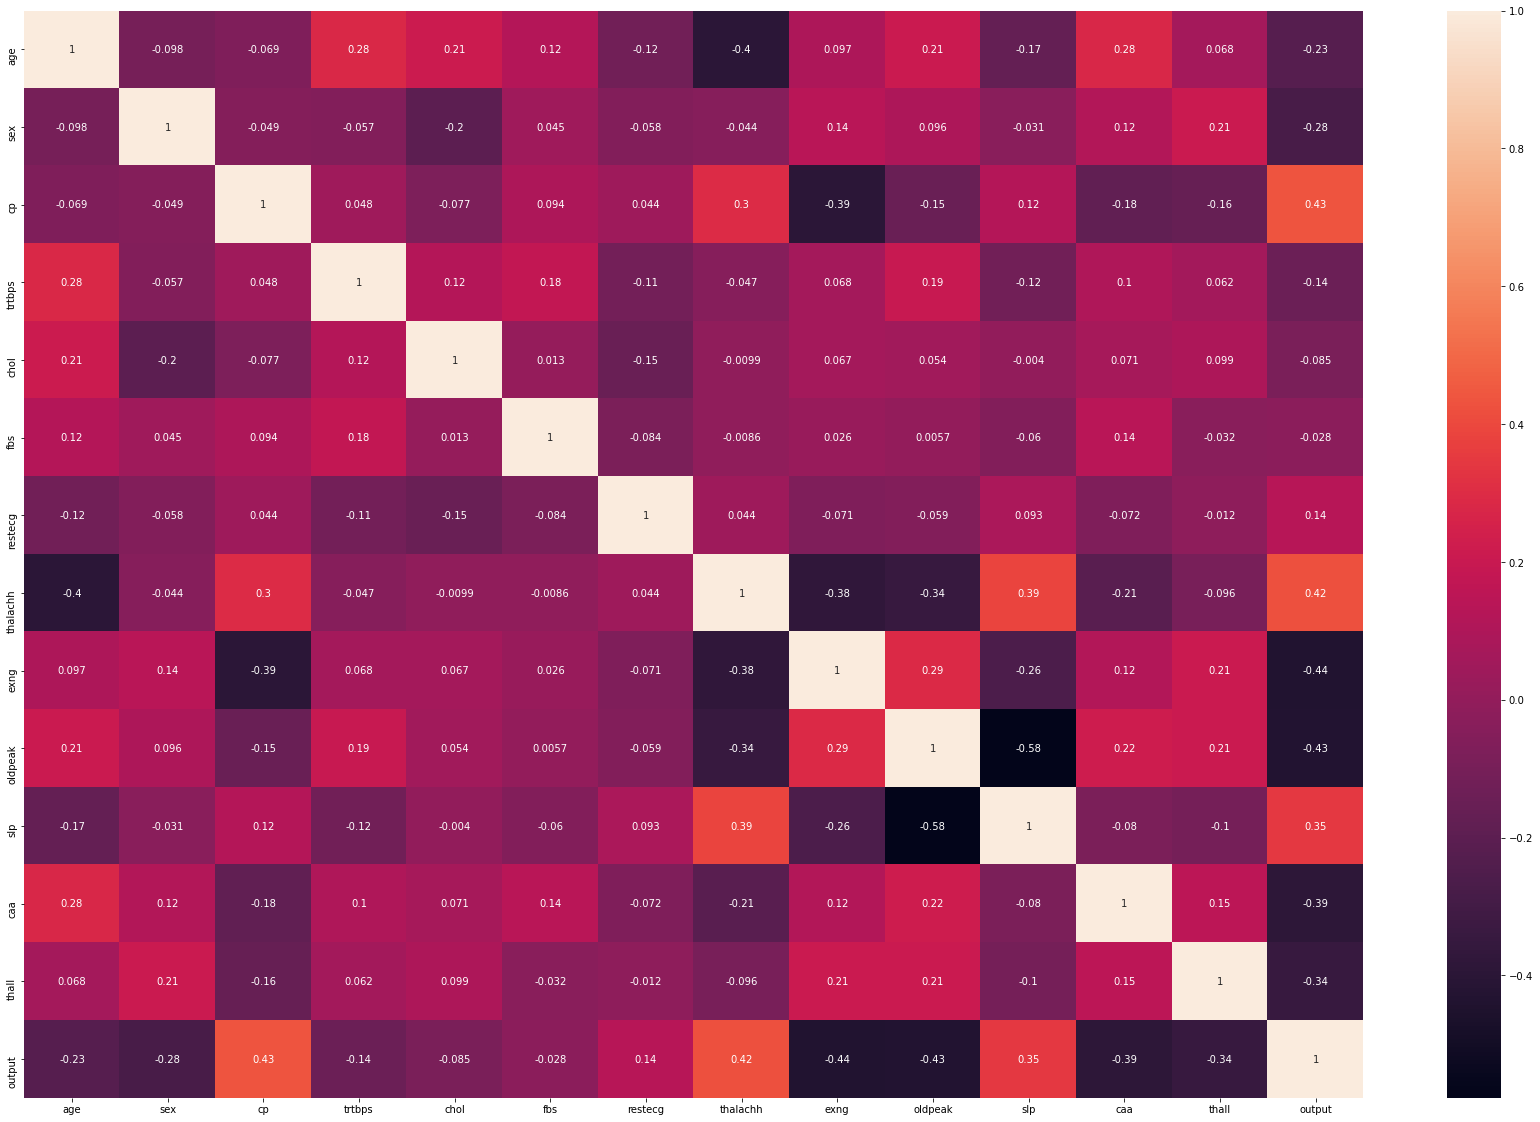

In [16]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

<Figure size 2160x2160 with 0 Axes>

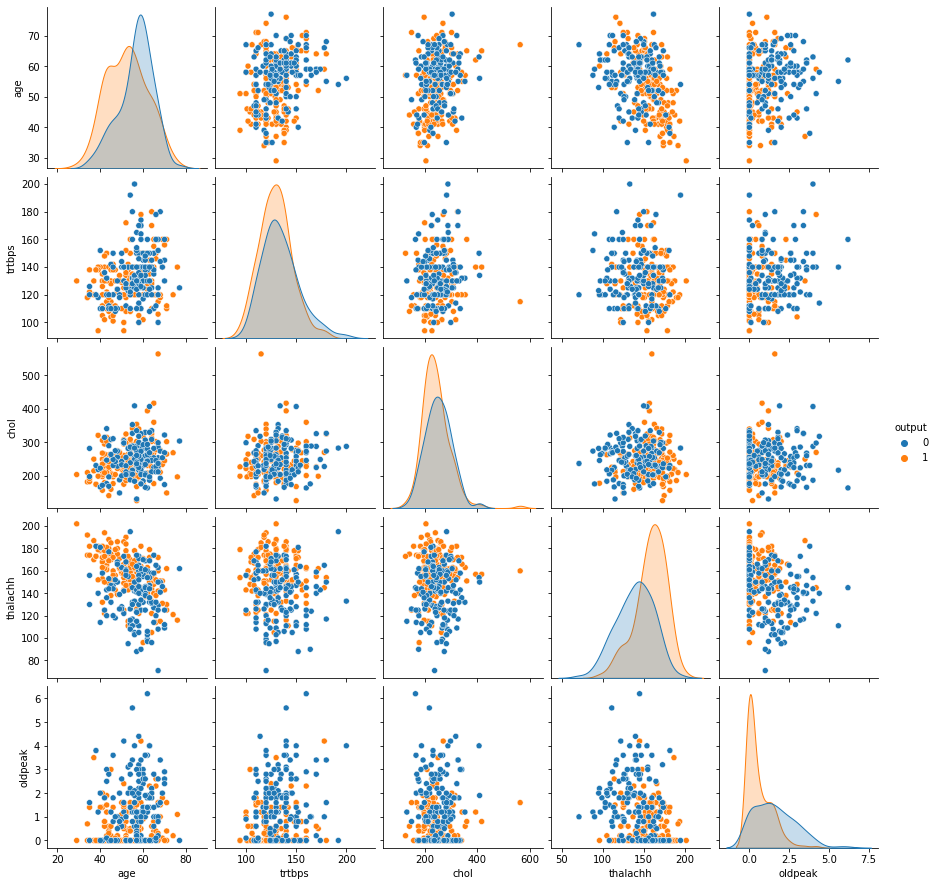

In [17]:
plt.figure(figsize=(30,30))

x_vars=['age','trtbps','chol','thalachh','oldpeak']
y_vars=['age','trtbps','chol','thalachh','oldpeak']

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue='output')

<Figure size 2160x2160 with 0 Axes>

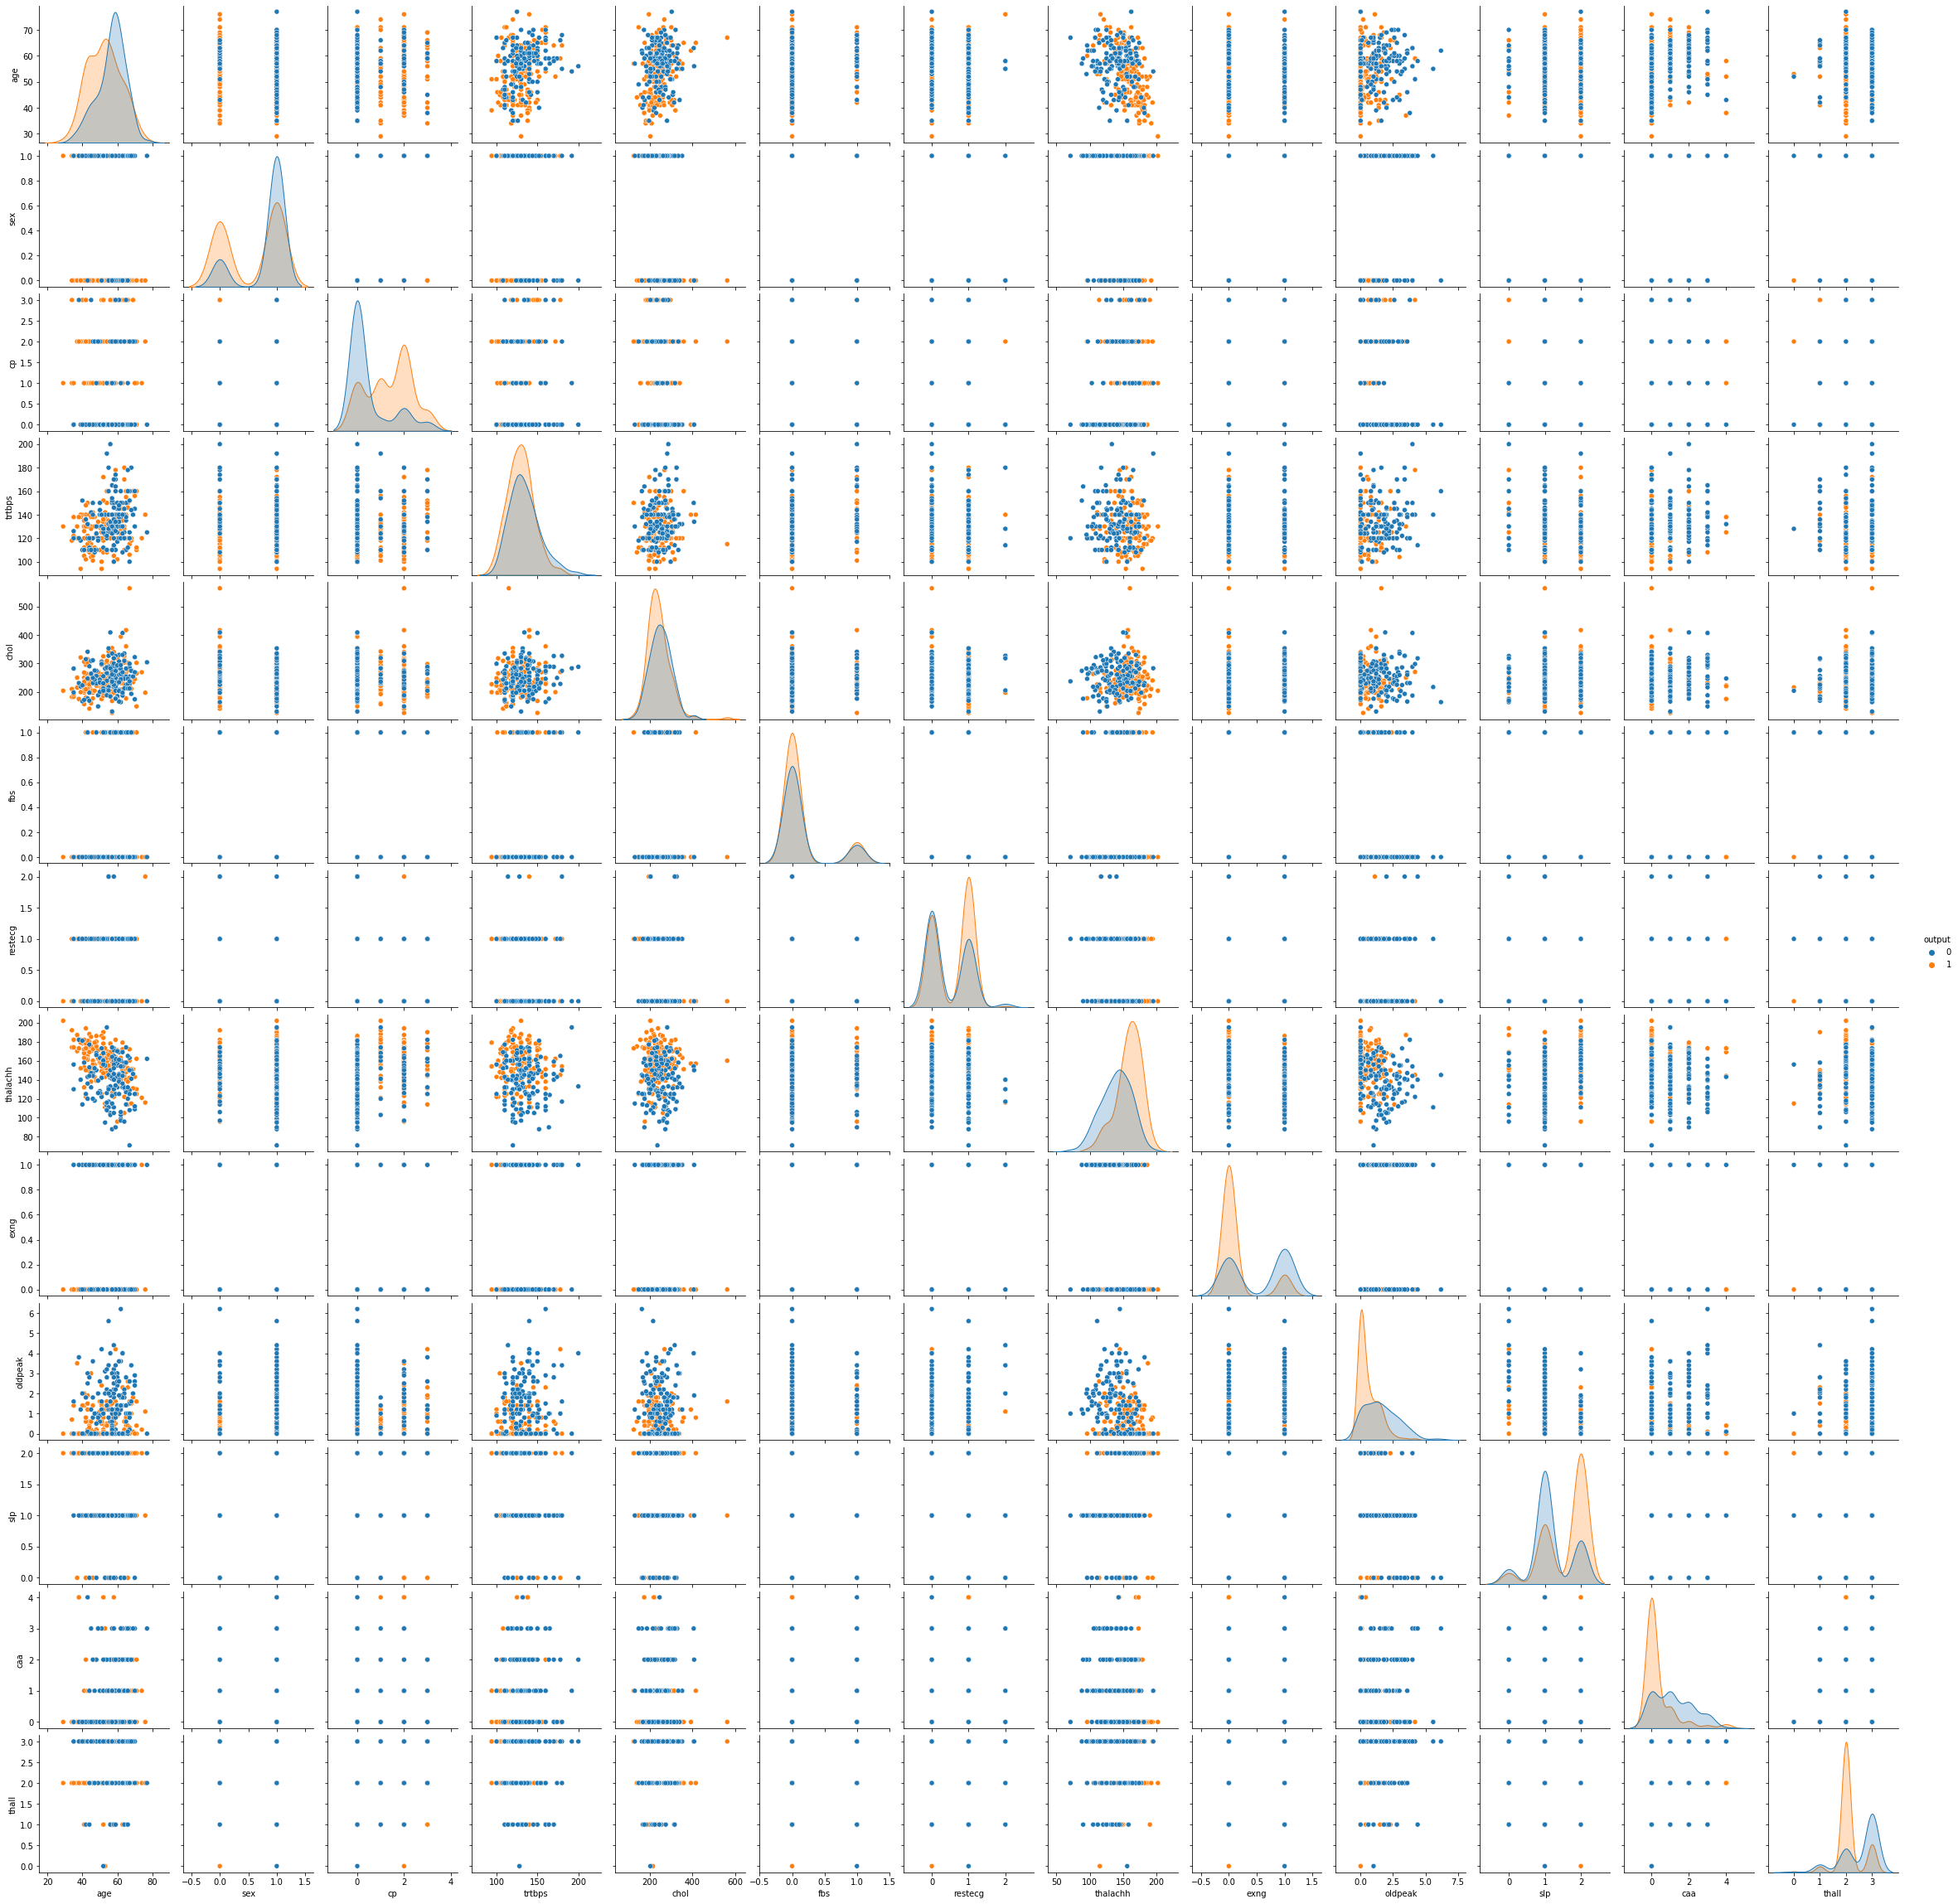

In [18]:
plt.figure(figsize=(30,30))

sns.pairplot(data=df,hue='output')

# Modelling

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [20]:
df1=df.copy()

cat_features=['sex','exng','caa','cp','fbs','restecg','thall','slp']
con_features=['age','trtbps','chol','thalachh','oldpeak']

df1=pd.get_dummies(df1,columns=cat_features,drop_first=True)

ss=StandardScaler()
df1[con_features]=ss.fit_transform(df1[con_features])

In [21]:
Y=df1['output']
X=df1.drop('output',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

## 1. Logistic Regression

In [22]:
model1 = LogisticRegression(random_state=50)
logit = model1.fit(X_train, y_train)
y_pred_logit=model1.predict_proba(X_test)
y_pred_logit=np.argmax(y_pred_logit,axis=1)

In [23]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

Accuracy Logit: 0.8681318681318682
Precision Logit: 0.88
Recall Logit: 0.88
F1 Score Logit: 0.88


In [24]:
ans=classification_report(y_test,y_pred_logit)
print(ans)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



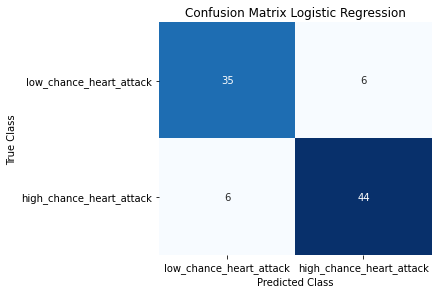

In [25]:
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['low_chance_heart_attack', 'high_chance_heart_attack']
                     , columns=['low_chance_heart_attack', 'high_chance_heart_attack'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
#AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.92


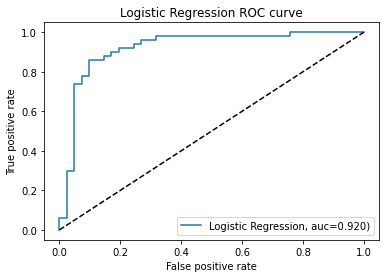

In [27]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

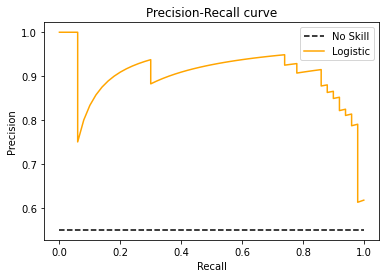

In [28]:
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

## 3. Random Forest

In [29]:
model3 = RandomForestClassifier(random_state=0)
rf = model3.fit(X_train, y_train)

In [30]:
y_pred_rf = model3.predict(X_test)

In [31]:
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.8131868131868132
Precision RF: 0.8367346938775511
Recall RF: 0.82
F1 Score RF: 0.8282828282828283


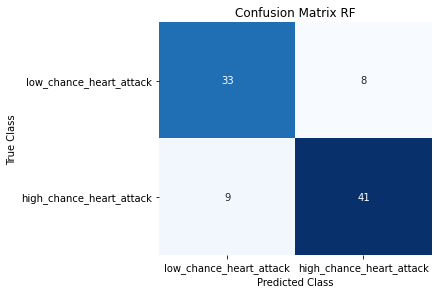

In [32]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['low_chance_heart_attack', 'high_chance_heart_attack']
                     , columns=['low_chance_heart_attack', 'high_chance_heart_attack'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [33]:
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9041463414634147


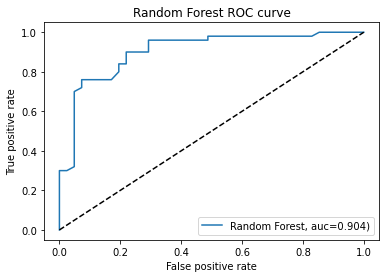

In [34]:
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

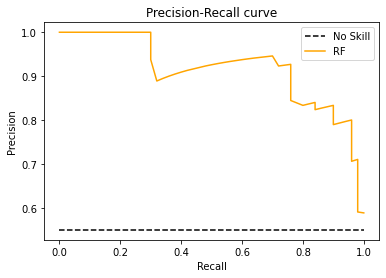

In [35]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()